<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

In [2]:
## Create data points (circles)

# Make Random Circles
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

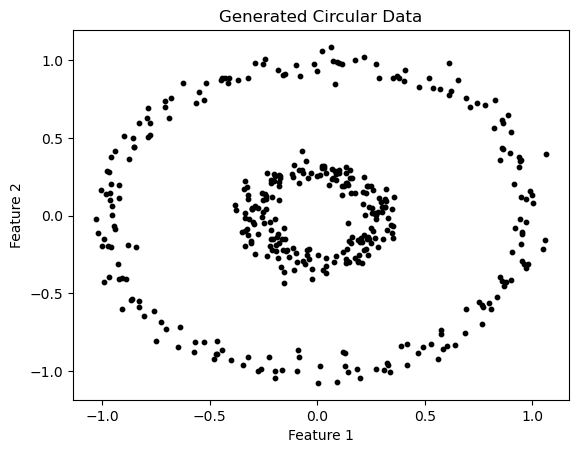

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], s=10, c='black')
plt.title('Generated Circular Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
## Convert data into a DataFrame

# Declare the column names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [21]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean     0.000828    0.003473
std      0.529561    0.528688
min     -1.058901   -1.088123
25%     -0.271510   -0.287910
50%      0.015131   -0.003035
75%      0.297765    0.300884
max      1.186512    1.076892

Sample of X__________________________________________________
          A         B
0 -0.240204 -0.293167
1 -0.124173 -0.242381
2  0.021675  0.300767
3  0.185729  0.263060
4  0.764925 -0.660237


C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


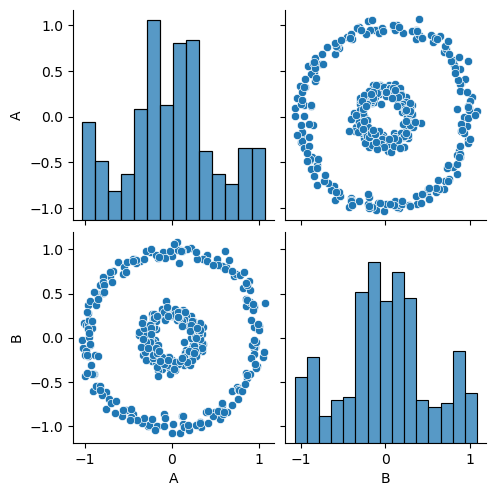

In [7]:
sbn.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

### Question: Which features could/should be used to cluster the data points?

In [79]:
np.random.seed(0)  # For reproducibility
X = pd.DataFrame({
    'A': np.random.rand(100),
    'B': np.random.rand(100)
})

In [103]:
def create_centroids(K, features, X):
    centroids = []
    min_values = X[features].min()
    max_values = X[features].max()
    for _ in range(K):
        dimensions = [np.random.uniform(min_values[f], max_values[f]) for f in features]
        centroids.append(dimensions)
    return centroids

In [105]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # Determine the minimum and maximum values for each feature
    min_values = features.min()
    max_values = features.max()
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(min_values[f], max_values[f])
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)

    return centroids

In [107]:
K = 3  # Number of clusters
centroids = create_centroids(K, X)
print("Generated Centroids:")
print(centroids)

Generated Centroids:
[[0.08389754473943453, 0.5133522655697018], [0.22298364944391125, 0.2326911574928588], [0.5261265027133359, 0.4987119015430631]]


In [129]:
def closest_centroid(x, centroids):
    distances = []
    p = np.array(x)
    for c in centroids:
        q = np.array(c)
        d = np.linalg.norm(p - q)
        distances.append(d)
    return np.array(distances).argmin()

In [133]:
# Define a specific data point
data_point = [0.5, 0.5]  # Example data point with the same number of features as centroids


In [135]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.linalg.norm(p - q)
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [137]:
# Get the index of the closest centroid
closest_index = closest_centroid(data_point, centroids)

# Print the coordinates of the closest centroid using the index
print(f"The closest centroid is {centroids[closest_index]}.")

The closest centroid is [0.5590468086359475, 0.5112031468396374].


In [139]:
X = pd.DataFrame({
    'A': np.random.rand(400),
    'B': np.random.rand(400)
})

# Example cluster assignments (with 400 elements)
y = np.random.randint(0, 5, size=400)  # Suppose we have 5 clusters

# Example centroids
centroids = np.random.rand(5, 2).tolist()  # 5 clusters with 2 features


In [141]:
def update_centroid(X, y, centroids):
    c = []
    # For each of the existing centroids
    for i in range(len(centroids)):
        # Select data points for cluster i
        cluster_points = X.loc[y == i]
        if cluster_points.shape[0] > 0:
            # Calculate the mean for each feature
            dimensions = [cluster_points[col].mean() for col in X.columns]
            c.append(dimensions)
        else:
            # Keep the previous centroid if no points are in the cluster
            c.append(centroids[i])
    
    return c

In [143]:
# Calculate updated centroids
new_centroids = update_centroid(X, y, centroids)

# Print updated centroids
print("Updated Centroids:")
for i, centroid in enumerate(new_centroids):
    print(f"Centroid {i}: {centroid}")

Updated Centroids:
Centroid 0: [0.4797838202710875, 0.4995741343250458]
Centroid 1: [0.5243348031914419, 0.5217071748887433]
Centroid 2: [0.5276097166267871, 0.5521304047058523]
Centroid 3: [0.5133291764604956, 0.42264489449550374]
Centroid 4: [0.52076223770477, 0.5101817407720615]


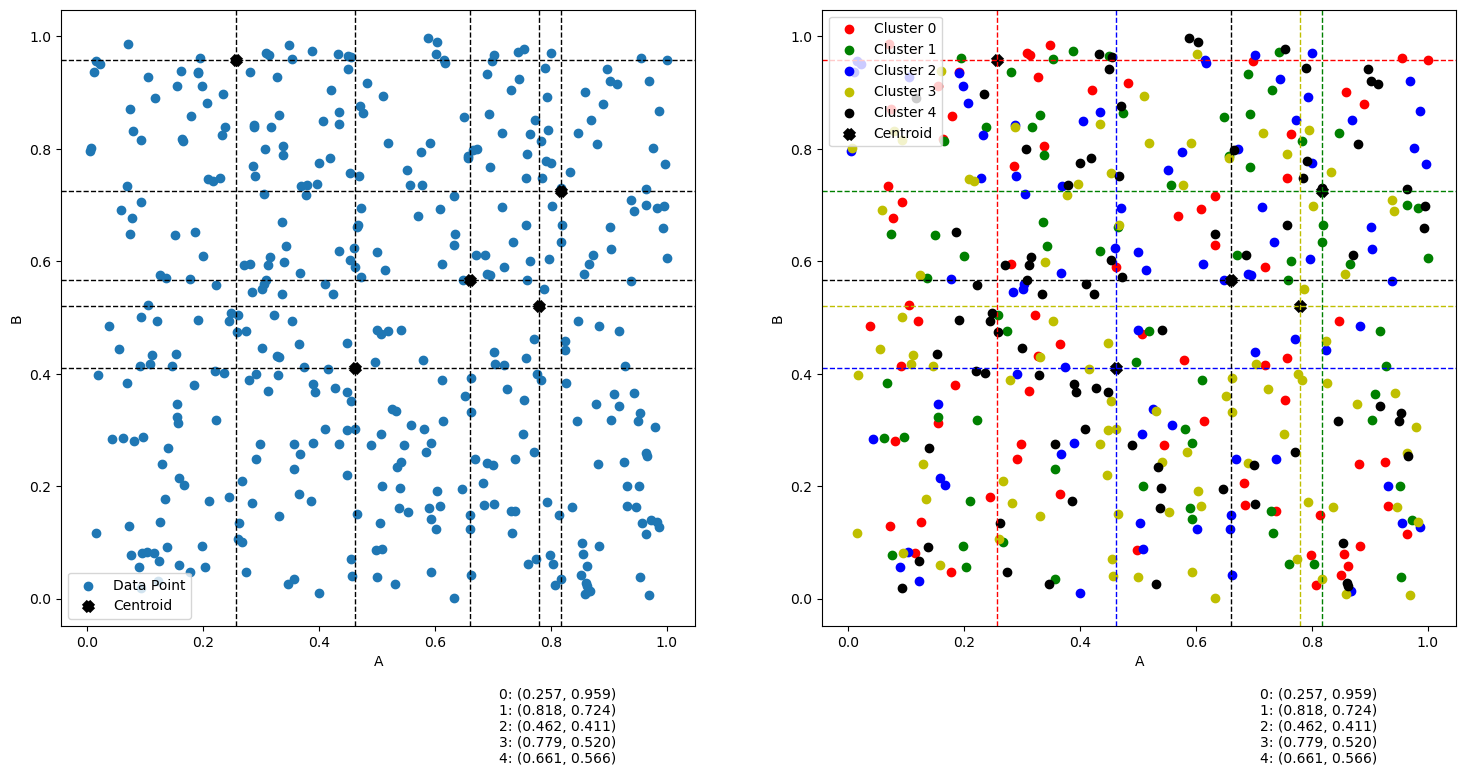

In [149]:
def plot_data(ax, X, y, centroids, show_clusters=True):
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]
    features = X.columns.tolist()
    colours = 'rgbykcm'
    
    if show_clusters:
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], 
                       c=colours[i % len(colours)], label=f'Cluster {i}')
    else:
        ax.scatter(X[features[0]], X[features[1]], label='Data Point')
    
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.scatter(a, b, c='k', linewidths=5, marker='x', label='Centroid')
    
    for i in range(len(a)):
        c = colours[i % len(colours)] if show_clusters else 'k'
        ax.axvline(x=a[i], color=c, linestyle='--', linewidth=1)
        ax.axhline(y=b[i], color=c, linestyle='--', linewidth=1)
    
    t = '\n'.join([f'{i}: ({a:.3f}, {b:.3f})' for i, (a, b) in enumerate(centroids)])
    ax.text(0.69, -0.1, t, transform=ax.transAxes, fontsize=10, verticalalignment='top')
    ax.legend()

# Plot initial centroids and clusters
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
plot_data(axes[0], X[features], None, centroids, False)
plot_data(axes[1], X[features], y, centroids)
plt.show()


Convergence reached


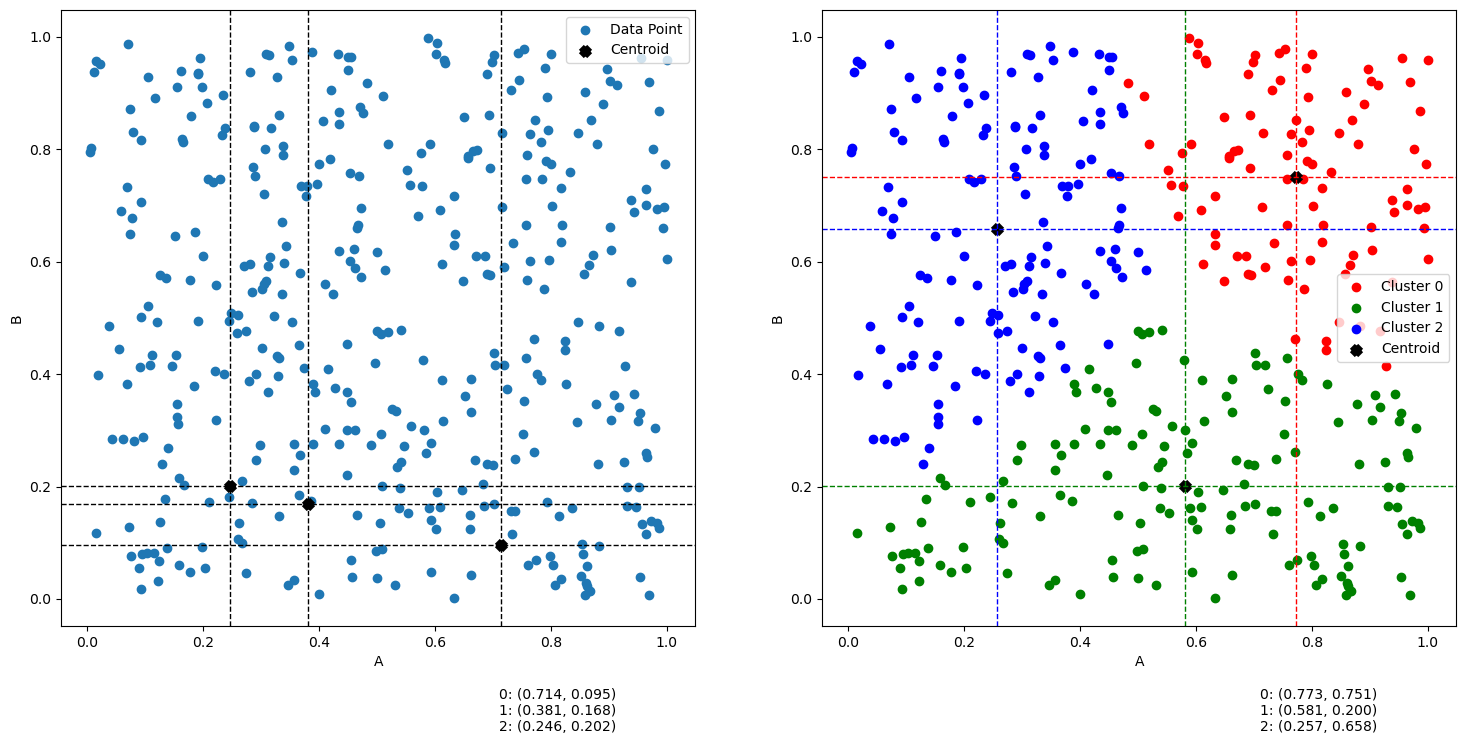

In [151]:
# Example usage
K = 3
features = ['A', 'B']

# Assuming X is your DataFrame with the data
centroids = create_centroids(K, X)

# Plot initial centroids
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
plot_data(axes[0], X[features], None, centroids, False)

while True:
    y = np.array([closest_centroid(x, centroids) for x in X[features].values])
    old_c = centroids.copy()
    centroids = update_centroid(X[features], y, centroids)
    if np.all(np.array(old_c) == np.array(centroids)):
        print("Convergence reached")
        break

plot_data(axes[1], X[features], y, centroids)
plt.show()

In [153]:
def plot_data(ax, X, y, centroids, show_clusters=True):
    # Extract centroids coordinates
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # Define feature names (assuming first two columns of X)
    features = X.columns.tolist()
    # Define colors for clusters
    colours = 'rgbykcm'  # Add more colors if needed

    if show_clusters:
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], 
                       c=colours[i % len(colours)], label=f'Cluster {i}')
    else:
        ax.scatter(X[features[0]], X[features[1]], label='Data Point')

    # Label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # Plot centroids
    ax.scatter(a, b, c='k', linewidths=5, marker='x', label='Centroid')
    
    # Plot vertical and horizontal lines for centroids
    for i in range(len(a)):
        c = colours[i % len(colours)] if show_clusters else 'k'
        ax.axvline(x=a[i], color=c, linestyle='--', linewidth=1)
        ax.axhline(y=b[i], color=c, linestyle='--', linewidth=1)

    # Create a text to show the centroids' coordinates
    t = '\n'.join([f'{i}: ({a:.3f}, {b:.3f})' for i, (a, b) in enumerate(centroids)])
    ax.text(0.69, -1.1, t, transform=ax.transAxes, fontsize=10, verticalalignment='top')

    ax.legend()

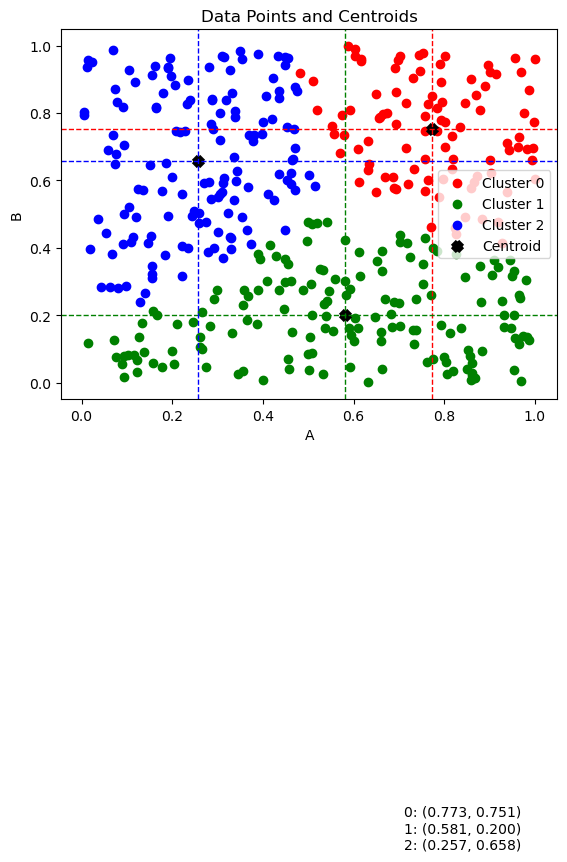

In [155]:
fig, ax = plt.subplots()
plot_data(ax, X, y, centroids, show_clusters=True)
plt.title('Data Points and Centroids')
plt.show()

### Question: What happens if the algorithm is run multiple times?
### Question: What happens if `K` is changed?

In [ ]:
#Multiple Runs: K-Means can yield different results due to the random initialization of centroids.
Running the algorithm multiple times and using techniques like K-Means++ can help improve results.

In [ ]:
#Changing K: The choice of K affects the clustering quality. Too few or too many clusters can lead
to poor clustering performance. Use methods like the elbow method and silhouette score to find an optimal K.

In [169]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [170]:
np.random.seed(42)  # Set a seed for reproducibility

C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

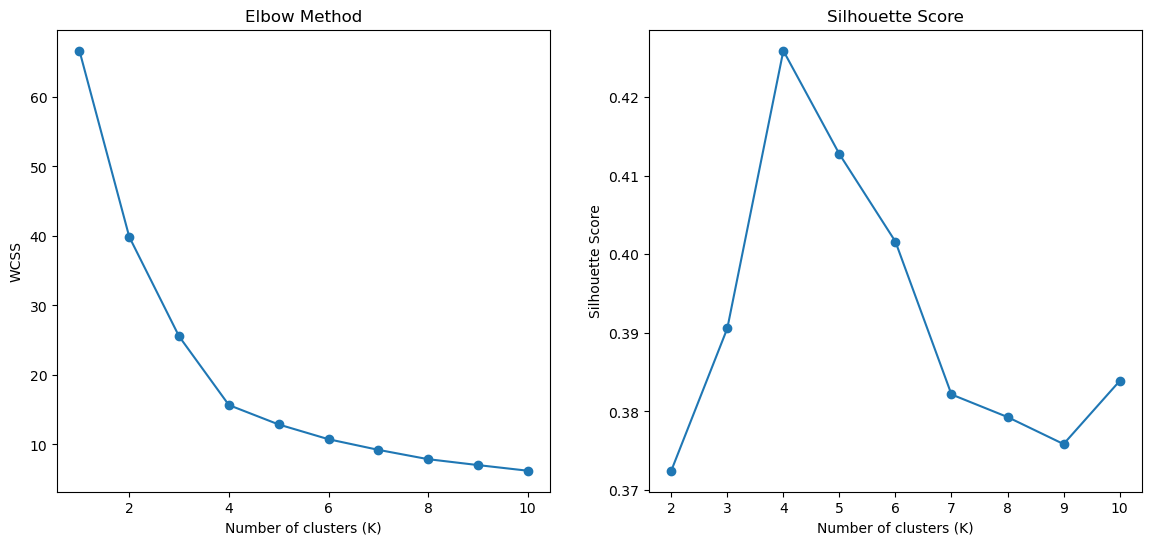

In [173]:
wcss = []
sil_scores = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    if k > 1:  # Silhouette score requires at least 2 clusters
        sil_scores.append(silhouette_score(X, kmeans.labels_))

# Plot WCSS
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range[1:], sil_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

>

>

>



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



